In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

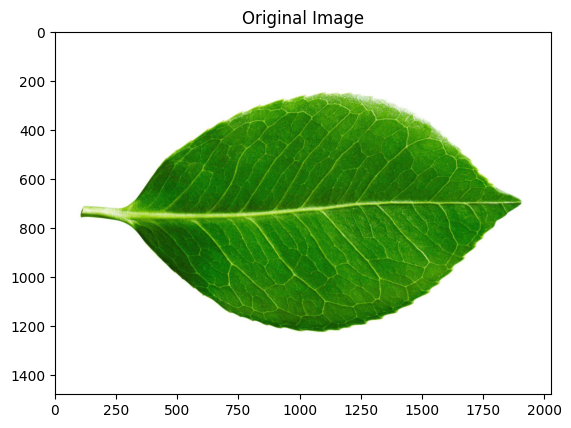

In [2]:
img0 = Image.open("leaf.jpeg")
img = np.array(img0)

h = img.shape[0]
w = img.shape[1]

img_rgb = []
for i in range(img.shape[2]):
    img_rgb.append(img[:,:,i])

plt.title("Original Image")
plt.imshow(img)
plt.show()

## Convert to Grayscale
Convert image to grayscale to analyse the histogram and decide the threshold

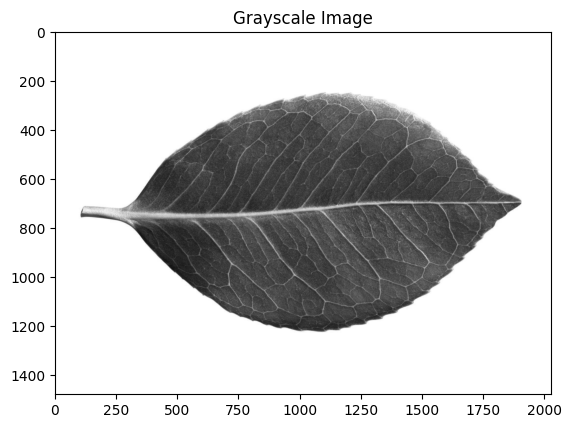

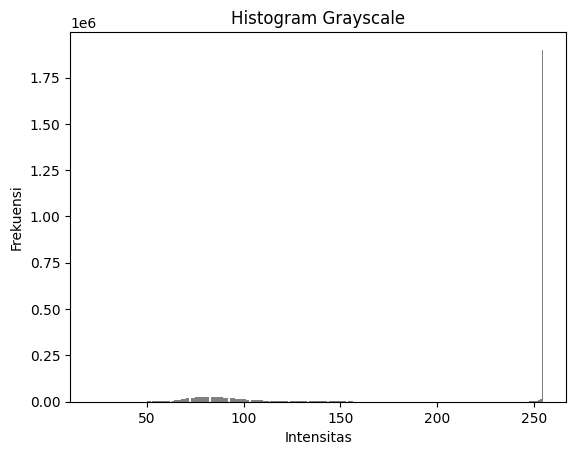

In [11]:
img_gray = img0.convert('L')
img_gray = np.array(img_gray)
plt.title("Grayscale Image")
plt.imshow(img_gray, cmap='gray')
plt.show()

plt.hist(np.array(img_gray).flatten(), bins=256, color='gray')
plt.title('Histogram Grayscale')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.show()

## Basic Thresholding Segmentation Method

In [4]:
class BasicSegmentation():
    def __init__(self):
        pass

    def global_thresholding(self, gray_image, threshold):
        result = np.zeros((h, w), dtype=int)
        for i in range(h):
            for j in range(w):
                if(gray_image[i, j] < threshold):
                    result[i, j] = 255
                else:
                    result[i, j] = 0
        
        result = result/255
        return result
    
    def local_thresholding():
        pass

    def frame_difference():
        pass

class AdaptiveSegmentation():
    def __init__(self):
        pass

    def otsu_method():
        pass

    def thresholding_by_probability():
        pass

class RegionFeatureSegmentation():
    def __init__(self):
        pass

    def region_growing():
        pass

    def watershed():
        pass

    def segmentation_as_clustering():
        pass

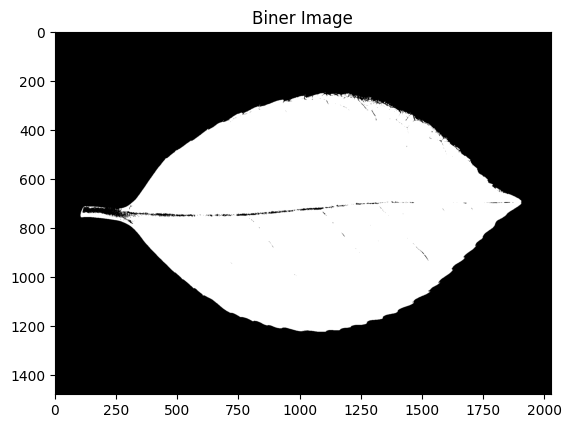

In [12]:
basicSegmentation = BasicSegmentation()
img_biner = basicSegmentation.global_thresholding(img_gray, 200)
plt.title("Biner Image")
plt.imshow(img_biner, cmap='gray')
plt.show()
            
# img_biner = np.zeros((h, w), dtype=int)
# for i in range(h):
#     for j in range(w):
#         if (img_gray[i, j] < 200):
#             img_biner[i, j] = 255
#         else:
#             img_biner[i, j] = 0

# img_biner = img_biner/255
# plt.title("Biner Image")
# plt.imshow(img_biner)
# plt.show()
            

## Morphology

In [6]:
class Morphology():
    def __init__(self):
        pass

    # def erosi_kernel(self):
    #     kernel = np.array([[0, 1, 1, 1, 0],
    #                        [1, 1, 1, 1, 1],
    #                        [1, 1, 1, 1, 1],
    #                        [1, 1, 1, 1, 1],
    #                        [0, 1, 1, 1, 0]])
        
    #     return kernel
    
    # def dilasi_kernel(self):
    #     kernel = np.array([[0, 1, 1, 1, 0],
    #                        [1, 1, 1, 1, 1],
    #                        [1, 1, 1, 1, 1],
    #                        [1, 1, 1, 1, 1],
    #                        [0, 1, 1, 1, 0]])
        
    #     return kernel
    
    @staticmethod
    def generate_kernel(size=3, shape='square'):
        """
        Membuat kernel untuk operasi morfologi (erosi/dilasi).
        
        Parameters:
        - size (int): ukuran kernel (harus ganjil, misalnya 3, 5, 7)
        - shape (str): bentuk kernel ('square', 'cross', 'circle')
        
        Returns:
        - kernel (np.ndarray): matriks kernel biner (1 = aktif, 0 = tidak aktif)
        """
        if size % 2 == 0:
            raise ValueError("Ukuran kernel harus ganjil agar memiliki pusat yang jelas.")
        
        if shape == 'square':
            kernel = np.ones((size, size), dtype=np.uint8)

        elif shape == 'cross':
            kernel = np.zeros((size, size), dtype=np.uint8)
            center = size // 2
            kernel[center, :] = 1
            kernel[:, center] = 1

        elif shape == 'circle':
            kernel = np.zeros((size, size), dtype=np.uint8)
            center = size // 2
            for i in range(size):
                for j in range(size):
                    if (i - center) ** 2 + (j - center) ** 2 <= (center) ** 2:
                        kernel[i, j] = 1

        else:
            raise ValueError("Bentuk kernel tidak dikenal. Gunakan 'square', 'cross', atau 'circle'.")

        return kernel
    
    @staticmethod
    def intersection_check(local, kernel):
        for i in range(len(kernel)):
            for j in range(len(kernel[0])):
                if kernel[i][j] == 1 and local[i][j] != 1:
                    return False
        
        return True
    
    @staticmethod
    def union_check(local, kernel):
        for i in range(len(kernel)):
            for j in range(len(kernel[0])):
                if kernel[i][j] == 1 and local[i][j] == 1:
                    return True
        
        return False
    
    def erosi(self, binary_image, kernel):
        k_h, k_w = kernel.shape
        result = np.zeros_like(binary_image, dtype=int)
        for i in range(h-k_h+1):
            for j in range(w-k_w+1):
                local = binary_image[i:i+k_h, j:j+k_w]
                if self.intersection_check(local, kernel):
                    result[i+k_h//2, j+k_w//2] = 1
                else:
                    result[i+k_h//2, j+k_w//2] = 0

        return result
    
    def dilasi(self, binary_image, kernel):
        k_h, k_w = kernel.shape
        result = np.zeros_like(binary_image, dtype=int)
        for i in range(h-k_h+1):
            for j in range(w-k_w+1):
                local = binary_image[i:i+k_h, j:j+k_w]
                if self.union_check(local, kernel):
                    result[i+k_h//2, j+k_w//2] = 1
                else:
                    result[i+k_h//2, j+k_w//2] = 0
        
        return result
    
    # erosi -->> dilasi 
    def opening(self, binary_image, kernel):
        step_1 = self.erosi(binary_image, kernel)
        result = self.dilasi(step_1, kernel)
        return result 
    
    # dilasi -->> erosi
    def closing(self, binary_image, kernel):
        step_1 = self.dilasi(binary_image, kernel)
        result = self.erosi(step_1, kernel)
        return result

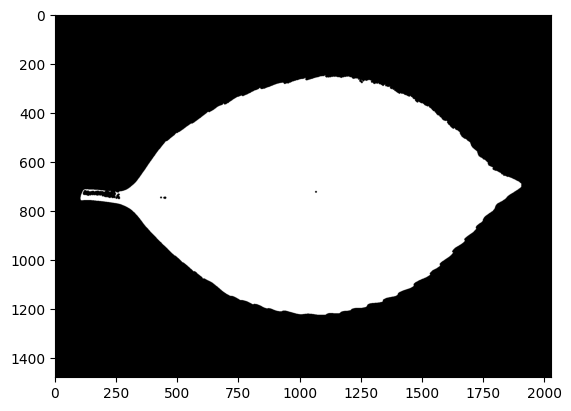

In [15]:
morphology = Morphology()
kernel = morphology.generate_kernel(9, 'circle')
result_closing = morphology.closing(img_biner, kernel)
plt.imshow(result_closing, cmap='gray')
plt.show()

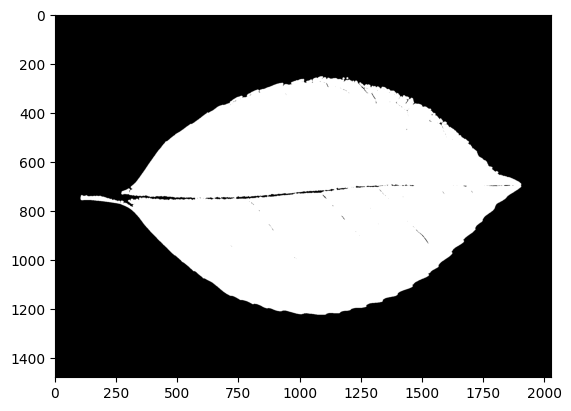

In [16]:
result_opening = morphology.opening(img_biner, kernel)
plt.imshow(result_opening, cmap='gray')
plt.show()